#### import library เกี่ยวข้อง

In [1]:
import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt

%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) #ปรับกราฟให้มีขนาด 10x6

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

1. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS: proportion of non-retail business acres per town
3. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. NOX: nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124
5. RM: average number of rooms per dwelling
6. AGE: proportion of owner-occupied units built prior to 1940
7. DIS: weighted distances to ﬁve Boston employment centers
8. RAD: index of accessibility to radial highways
9. TAX: full-value property-tax rate per $10\,000

10. PTRATIO: pupil-teacher ratio by town 
11. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
12. LSTAT: \% lower status of the population
13. MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

#### อ่านข้อมูลจากไฟล์ excel

In [2]:
advert = pd.read_csv('Boston.csv')
advert.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


#### จากข้อมูลข้างต้นเป็น data type ประเภทใด

1. พิจารณาว่าข้อมูลมีความสัมพัน์กันหรือไม่ โดย scattter plot
(อย่างน้อย 4 ตัวแปรอิสระ)

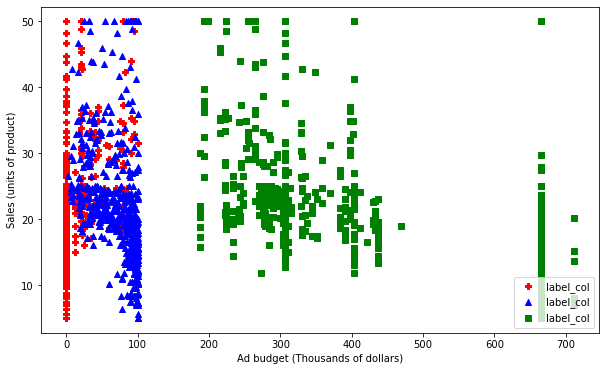

In [7]:

plt.scatter(x=advert['ZN'],y=advert['MEDV'],c='r',marker='P',label='label_col')
plt.scatter(x=advert['AGE'],y=advert['MEDV'],c='b',marker='^',label='label_col')
plt.scatter(x=advert['TAX'],y=advert['MEDV'],c='g',marker='s',label='label_col')



#plt.legend(numpoints=1,loc=4)
plt.legend(loc=4)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()

#### 2. หาค่า correlation

In [3]:
print(advert.corr())

                 CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM         1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN          -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS        0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS        -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX          0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM          -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE          0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS         -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD          0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX          0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO      0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
B           -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069   
LSTAT        0.455621 -0.

#### plot scatter matrix

#### 3. พิจารณาว่าตัวแปรใดเป็นตัวแปรตาม และตัวแปรอิสระ 
#### เมื่อพิารณาได้แล้ว หา regression model เพื่อพยากรณ์ตัวแปรตามนั้น

1. ตัวแปรตามคือ คือ MEDV
2. ตัวแปรอิสระ คือ CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     62.89
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.56e-34
Time:                        16:20:26   Log-Likelihood:                -1759.5
No. Observations:                 506   AIC:                             3527.
Df Residuals:                     502   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5071      1.322     23.828      0.0

C:\Users\user\AppData\Local\Temp\ipykernel_11992\55274228.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(advert['ZN'],ZN_fit_model.predict(),'k',color='r',linewidth=3)
C:\Users\user\AppData\Local\Temp\ipykernel_11992\55274228.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(advert['AGE'],AGE_fit_model.predict(),'k',color='g',linewidth=3)
C:\Users\user\AppData\Local\Temp\ipykernel_11992\55274228.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(advert['ZN'],TAX_fit_model.predict(),'k',color='b',linewidth=3)


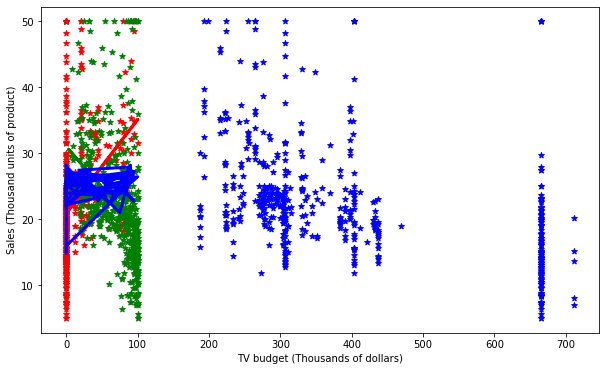

In [14]:
ad_ZN_ols = sm.ols(formula="MEDV ~ ZN", data=advert) 
ZN_fit_model = ad_ZN_ols.fit() # ปรับ model regression เพื่อให้ค่า error น้อยที่สุด
ad_AGE_ols = sm.ols(formula="MEDV ~ AGE", data=advert) 
AGE_fit_model = ad_AGE_ols.fit()
ad_TAX_ols = sm.ols(formula="MEDV ~ TAX", data=advert) 
TAX_fit_model = ad_TAX_ols.fit()
ad_TR_ols = sm.ols(formula="MEDV ~ ZN + AGE + TAX", data=advert).fit()
print(ad_TR_ols.summary())

plt.scatter(x=advert['ZN'],y=advert['MEDV'],c='r',marker='*',label='label_col')
plt.scatter(x=advert['AGE'],y=advert['MEDV'],c='g',marker='*',label='label_col')
plt.scatter(x=advert['TAX'],y=advert['MEDV'],c='b',marker='*',label='label_col')

# plt.plot(advert['col'],col_fit_model.predict(),'k',color='blue',linewidth=3)
plt.plot(advert['ZN'],ZN_fit_model.predict(),'k',color='r',linewidth=3)
plt.plot(advert['AGE'],AGE_fit_model.predict(),'k',color='g',linewidth=3)
plt.plot(advert['ZN'],TAX_fit_model.predict(),'k',color='b',linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

#### OLS Regression Results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     62.89
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.56e-34
Time:                        16:13:34   Log-Likelihood:                -1759.5
No. Observations:                 506   AIC:                             3527.
Df Residuals:                     502   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5071      1.322     23.828      0.000      28.909      34.105
ZN             0.0795      0.018      4.351      0.000       0.044       0.115
AGE           -0.0250      0.017     -1.503      0.134      -0.058       0.008
TAX           -0.0200      0.002     -8.296      0.000      -0.025      -0.015
==============================================================================
Omnibus:                      203.569   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              735.075
Skew:                           1.870   Prob(JB):                    2.40e-160
Kurtosis:                       7.568   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 4. เขียนสมการ Linear Regression ที่ได้จากข้อ 3

In [15]:
ad_TR_ols = sm.ols(formula="MEDV ~ AGE + ZN +TAX", data=advert).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     62.89
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.56e-34
Time:                        16:25:39   Log-Likelihood:                -1759.5
No. Observations:                 506   AIC:                             3527.
Df Residuals:                     502   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5071      1.322     23.828      0.000      28.909      34.105
AGE           -0.0250      0.017     -1.503      0.134      -0.058       0.008
ZN             0.0795      0.018      4.351      0.000       0.044       0.115
TAX           -0.0200      0.002     -8.296      0.000      -0.025      -0.015
==============================================================================
Omnibus:                      203.569   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              735.075
Skew:                           1.870   Prob(JB):                    2.40e-160
Kurtosis:                       7.568   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# MEDV = 31.5071+0.0250*AGE+0.0795∗ZN+-0.0200∗TAX

#### 5. ถ้ามีข้อมูลใหม่ดังนี้  แบบ 1
CRIM: 0.21124
1. ZN: 18
2. INDUS: 7.87
3. CHAS: 0
4. NOX: 0.538
5. RM: 7.147
6. AGE: 65.2
7. DIS: 4.09
8. RAD: 5
9. TAX: 311
10. PTRATIO: 18.7
11. B: 396.9
12. LSTAT:2.94
#### ใช้สมการที่ได้้จากข้อ 4 คำนวณข้อมูลใหม่ดังกล่าว 

OLS Regression Results (predict)

In [22]:
df ={"ZN":[18],"INDUS": [7.87],"CHAS": [0],"NOX": [0.538],"RM": [7.147],"AGE": [65.2],"DIS": [4.09],"RAD": [5],"TAX": [311],"PTRATIO": [18.7],"B": [396.9],"LSTAT":[2.94]}

In [30]:
new = pd.DataFrame(df)
ad_TR_ols.predict(new)

0    25.088611
dtype: float64